<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-sivani/Optiver_stock_closing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
# SDAI CSCE 5214

## Dataset: Optiver stock closing price

Description:

In the last ten minutes of the Nasdaq exchange trading session, market makers like Optiver merge traditional order book data with auction book data. This ability to consolidate information from both sources is critical for providing the best prices to all market participants.

In this competition, you are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and the closing auction of the stock. Information from the auction can be used to adjust prices, assess supply and demand dynamics, and identify trading opportunities.

kaggle link: https://www.kaggle.com/competitions/optiver-trading-at-the-close



In [ ]:
# Importing Libraries

# Data Collection
from google.colab import drive

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns



---


Data Collection

In [ ]:
# Getting data saved in drive

# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')

# Data Analysis

In [ ]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [ ]:
df.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
None


In [ ]:
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [ ]:
# Null Values

df.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [ ]:
rows_with_missing_target = df[df['target'].isna()]

# Print the extracted rows
rows_with_missing_target

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225338,158,388,510,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21391,388_510_158
4225538,158,388,520,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21392,388_520_158
4225738,158,388,530,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21393,388_530_158
4225938,158,388,540,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21394,388_540_158


In [ ]:
set(rows_with_missing_target.stock_id.unique())

{19, 101, 131, 158}

In [ ]:
set(df[df['imbalance_size'].isna()].stock_id.unique())

{19, 101, 131, 158}

imbalance_size -> depends on reference price -> depends on ask/bid price
['imbalance_size', 'reference_price', 'matched_size', 'bid_price', 'ask_price', 'wap'] all are related and are missing mostly for the same stock

Only 4 stocks have missing target values.

These 3 stocks have missing ask, bid and other missing features.

Selecting stock no. 52 for analysis

### Data Pre-processing

In [ ]:
# selecting stock no. 52

stock_52 = df[df['stock_id'] == 52]

Statistics

In [ ]:
stock_52.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,26455.0,26455.000000,26455.000000,2.645500e+04,26455.000000,26455.000000,2.645500e+04,11862.000000,12025.000000,26455.000000,26455.000000,26455.000000,2.645500e+04,26455.000000,26455.000000,26455.000000
mean,52.0,240.000000,270.000000,1.699169e+06,-0.004952,0.999857,1.124336e+07,0.999018,0.999357,0.999638,20964.674511,1.000083,2.245383e+04,0.999855,-0.267957,13227.000000
std,0.0,138.855064,158.748079,5.780928e+06,0.880137,0.002014,2.602365e+07,0.019145,0.010743,0.001997,26463.411029,0.001986,2.879619e+04,0.001996,7.475520,7637.045022
min,52.0,0.000000,0.000000,0.000000e+00,-1.000000,0.985837,7.869713e+05,0.822301,0.918404,0.985475,89.830000,0.986795,8.986000e+01,0.986307,-118.889810,0.000000
25%,52.0,120.000000,130.000000,4.927787e+04,-1.000000,0.998863,4.529822e+06,0.996729,0.997300,0.998682,3823.525000,0.999104,4.470280e+03,0.998884,-4.259944,6613.500000
50%,52.0,240.000000,270.000000,6.100030e+05,0.000000,0.999926,6.962677e+06,0.999762,0.999770,0.999711,12455.870000,1.000154,1.330375e+04,0.999954,-0.180006,13227.000000
75%,52.0,360.000000,410.000000,1.668496e+06,1.000000,1.000969,1.029906e+07,1.002735,1.002174,1.000726,27678.895000,1.001170,2.978696e+04,1.000945,3.759861,19840.500000
max,52.0,480.000000,540.000000,1.333038e+08,1.000000,1.008990,4.796631e+08,1.279803,1.099612,1.008729,404334.800000,1.009077,1.070635e+06,1.008758,174.200530,26454.000000


In [ ]:
stock_52.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26455 entries, 52 to 5237832
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 26455 non-null  int64  
 1   date_id                  26455 non-null  int64  
 2   seconds_in_bucket        26455 non-null  int64  
 3   imbalance_size           26455 non-null  float64
 4   imbalance_buy_sell_flag  26455 non-null  int64  
 5   reference_price          26455 non-null  float64
 6   matched_size             26455 non-null  float64
 7   far_price                11862 non-null  float64
 8   near_price               12025 non-null  float64
 9   bid_price                26455 non-null  float64
 10  bid_size                 26455 non-null  float64
 11  ask_price                26455 non-null  float64
 12  ask_size                 26455 non-null  float64
 13  wap                      26455 non-null  float64
 14  target             

Analyzing by time and date

In [ ]:
stock_52.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
52,52,0,0,1589228.95,-1,1.000204,7052889.31,NaN,NaN,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52
243,52,0,10,1321097.26,-1,1.000791,7321021.00,NaN,NaN,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52
434,52,0,20,1321097.26,-1,1.000707,7321021.00,NaN,NaN,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52
625,52,0,30,1285314.56,-1,1.000707,7356803.70,NaN,NaN,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52
816,52,0,40,1302609.53,-1,1.000875,7367299.96,NaN,NaN,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52


In [ ]:
# No. of days tracked for stock 52
days = len(set(stock_52.date_id.unique()))
print("Days:", days)

Days: 481


In [ ]:
# Sorting data by date_id and time_id
stock_52 = stock_52.copy()
stock_52.sort_values(by=['date_id', 'time_id'], inplace=True)


In [ ]:
stock_52.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
52,52,0,0,1589228.95,-1,1.000204,7052889.31,NaN,NaN,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52
243,52,0,10,1321097.26,-1,1.000791,7321021.00,NaN,NaN,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52
434,52,0,20,1321097.26,-1,1.000707,7321021.00,NaN,NaN,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52
625,52,0,30,1285314.56,-1,1.000707,7356803.70,NaN,NaN,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52
816,52,0,40,1302609.53,-1,1.000875,7367299.96,NaN,NaN,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52


### Feature Engineering

In [ ]:
# Create 'Minute of the Day' feature in 'stock_52'
stock_52['minute_of_day'] = stock_52['seconds_in_bucket'] // 60  # Convert seconds to minutes

# Create 'Day of the Week' feature based on relative day numbers in 'stock_52'
stock_52['day_of_week'] = (stock_52['date_id'] - stock_52['date_id'].min()) % 7

# Print the updated 'stock_52' DataFrame to see the new features
print(stock_52[['date_id', 'seconds_in_bucket', 'minute_of_day', 'day_of_week']])

         date_id  seconds_in_bucket  minute_of_day  day_of_week
52             0                  0              0            0
243            0                 10              0            0
434            0                 20              0            0
625            0                 30              0            0
816            0                 40              0            0
...          ...                ...            ...          ...
5237032      480                500              8            4
5237232      480                510              8            4
5237432      480                520              8            4
5237632      480                530              8            4
5237832      480                540              9            4

[26455 rows x 4 columns]


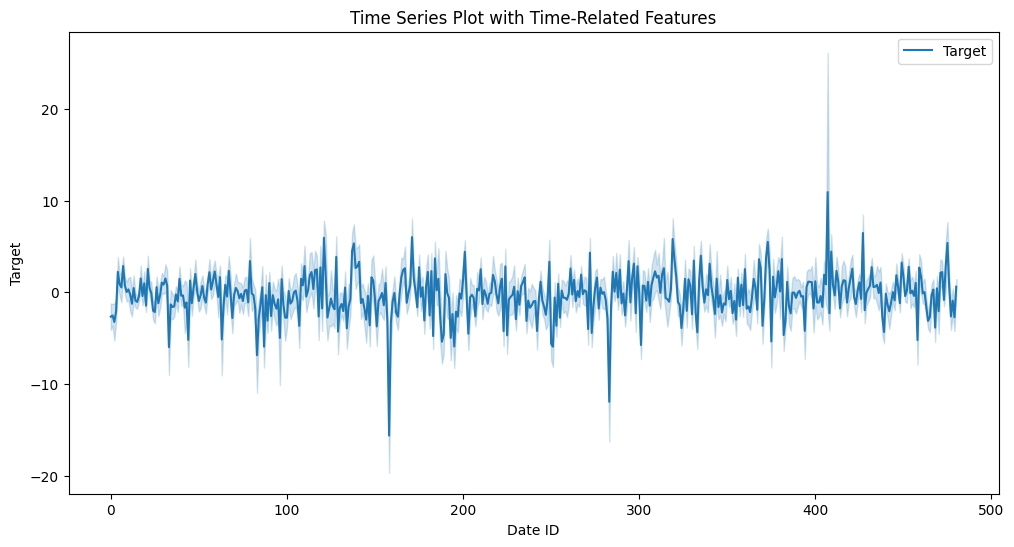

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_52' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_52, x='date_id', y='target', label='Target')


plt.title('Time Series Plot with Time-Related Features')
plt.xlabel('Date ID')
plt.ylabel('Target')
plt.legend()
plt.show()


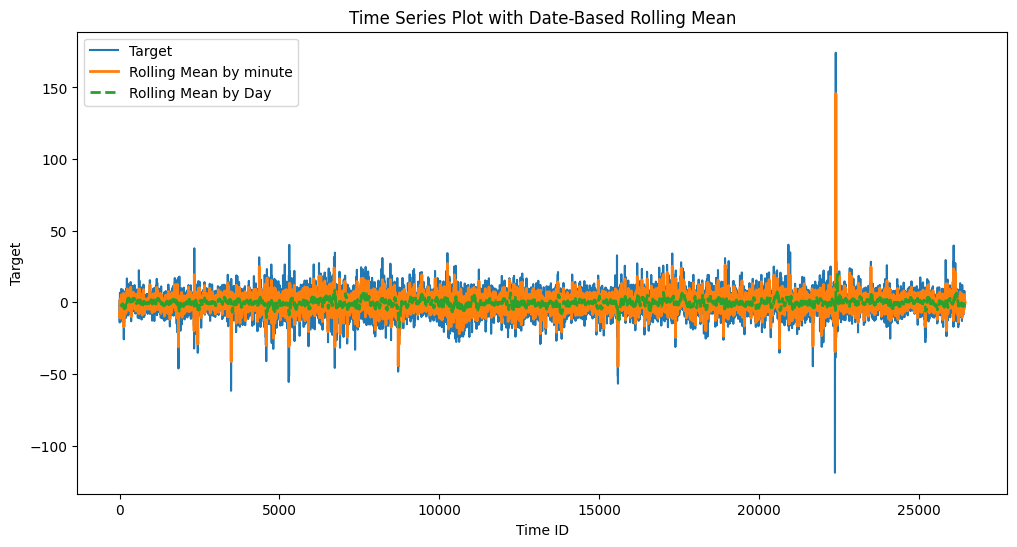

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_52' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_52, x='time_id', y='target', label='Target')

# Calculate rolling statistics with rolling window size based on 'date_id' groups
rolling_window_size = 54
rolling_window = stock_52.set_index('time_id').rolling(window=rolling_window_size)['target']

# Calculate rolling statistics with rolling window size based on each minute
rolling_window_size = 6
rolling_window_minute = stock_52.set_index('time_id').rolling(window=rolling_window_size)['target']


# Plot the rolling mean
minute_rolling_mean = rolling_window_minute.mean()
plt.plot(minute_rolling_mean, label='Rolling Mean by minute', linestyle='-', linewidth=2)

# Plot the rolling mean
rolling_mean = rolling_window.mean()
plt.plot(rolling_mean, label='Rolling Mean by Day', linestyle='--', linewidth=2)


plt.title('Time Series Plot with Date-Based Rolling Mean')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.legend()
plt.show()


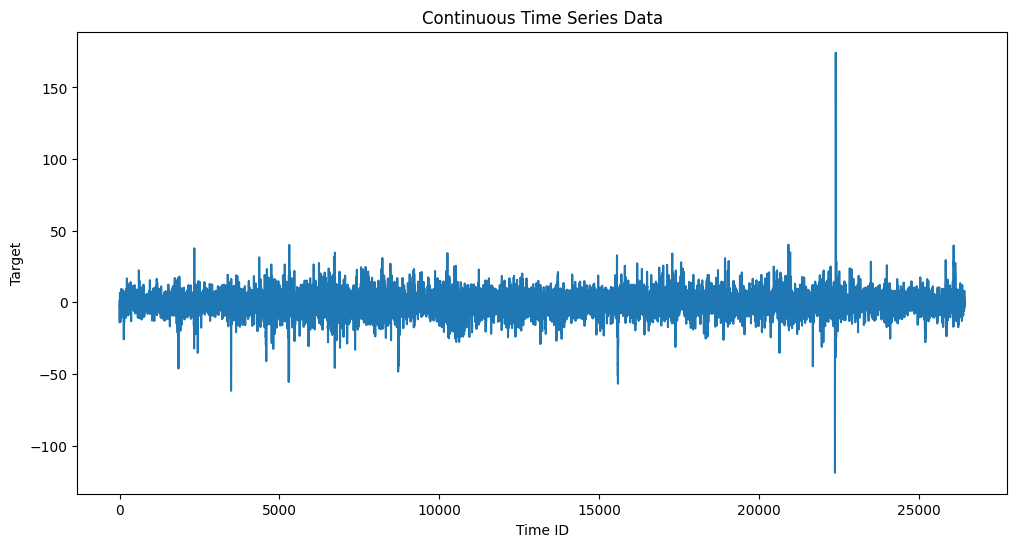

In [ ]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(stock_52['time_id'], stock_52['target'])
plt.title('Continuous Time Series Data')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Check Stationarity (Dickey-Fuller test)
result = adfuller(stock_52['target'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -26.241536507089812
p-value: 0.0


A negative value means the data is stationary

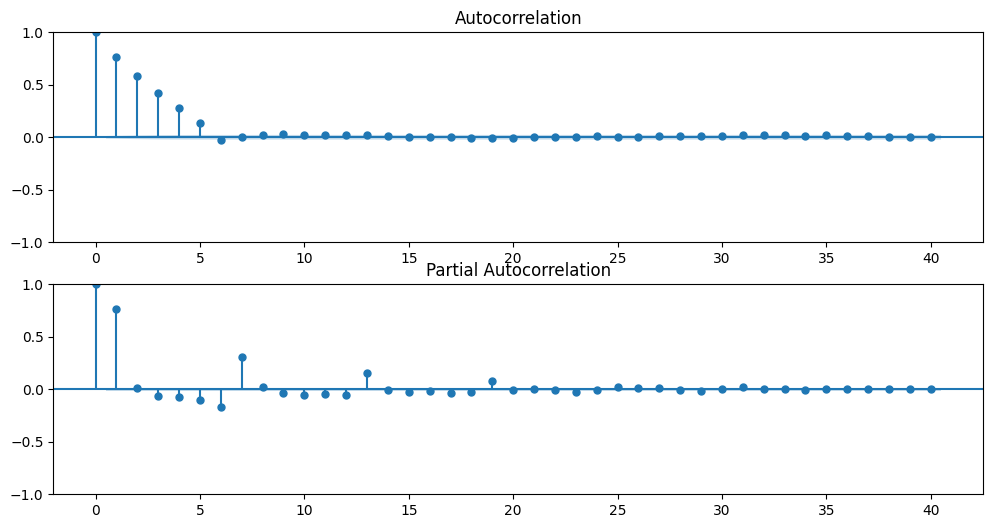

In [ ]:
# ACF and PACF analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(stock_52['target'], lags=40, ax=ax1)
plot_pacf(stock_52['target'], lags=40, ax=ax2)
plt.show()

Consider
q = 5
p = 1

In [ ]:
# Select p and q values
p = 1
d = 1
q = 1

In [ ]:
# Fit the ARIMA model
model = ARIMA(stock_52['target'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Model Evaluation

In [ ]:
# Step 8: Forecast the next 6 steps
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
print(f'Forecasted Values for Next {forecast_steps} Steps: {forecast}')

Forecasted Values for Next 6 Steps: 26455   -2.183828
26456   -1.669566
26457   -1.278348
26458   -0.980733
26459   -0.754326
26460   -0.582089
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Handling Missing Values

stock_52.isna().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  14593
near_price                 14430
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
minute_of_day                  0
day_of_week                    0
dtype: int64

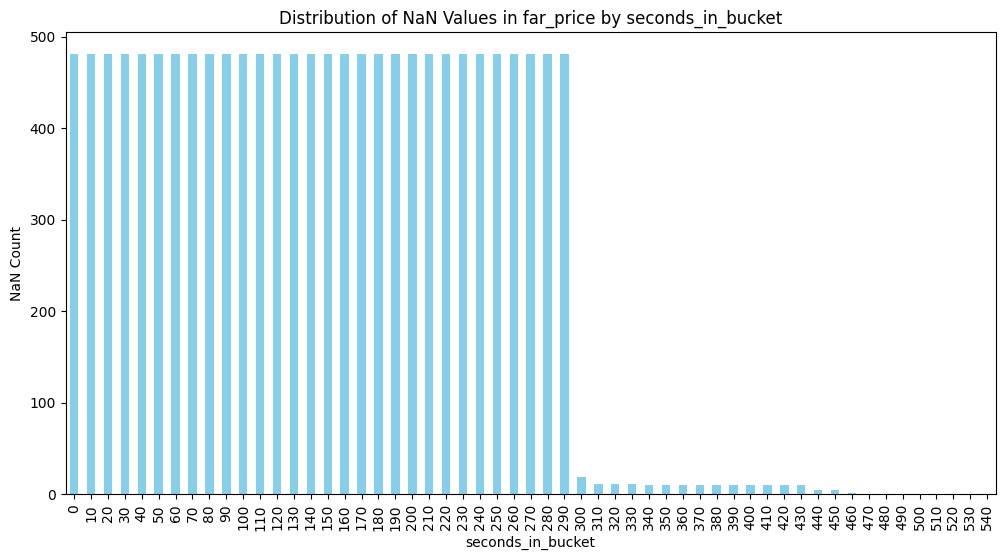

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named 'stock_52'
# Replace 'stock_52' with your actual DataFrame name

# Group the data by 'seconds_in_bucket' and calculate the count of NaN values in 'far_price'
nan_count = stock_52.groupby('seconds_in_bucket')['far_price'].apply(lambda x: x.isna().sum())

# Create a bar chart to visualize the distribution of NaN values
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of NaN Values in far_price by seconds_in_bucket')
plt.xlabel('seconds_in_bucket')
plt.ylabel('NaN Count')
plt.xticks(rotation=90)
plt.show()


Most of the missing values in far_price and near_price were because there were no prices matching

In [ ]:
stock_52.sort_values(by=['date_id', 'seconds_in_bucket'], inplace=True)

In [ ]:
stock_52[stock_52['date_id'] == 1]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,minute_of_day,day_of_week
10557,52,1,0,1446182.10,1,0.999465,2638319.69,NaN,NaN,0.999465,11915.00,1.001059,23629.32,1.000000,-10.499954,55,1_0_52,0,1
10748,52,1,10,1326253.06,1,0.999465,2758248.73,NaN,NaN,0.999046,714.60,0.999549,3455.64,0.999132,-3.769994,56,1_10_52,0,1
10939,52,1,20,1196071.64,1,0.999130,2888430.15,NaN,NaN,0.998794,2857.68,0.999214,15485.60,0.998859,-3.319979,57,1_20_52,0,1
11130,52,1,30,1225994.29,1,0.998878,2858507.50,NaN,NaN,0.998207,14518.00,0.998878,2619.76,0.998775,-2.149939,58,1_30_52,0,1
11321,52,1,40,1225994.29,1,0.998794,2858507.50,NaN,NaN,0.998207,12376.00,0.998794,26076.33,0.998396,2.770424,59,1_40_52,0,1
11512,52,1,50,974214.83,1,0.998794,3110286.96,NaN,NaN,0.998375,12021.02,0.998794,23814.00,0.998515,-0.039935,60,1_50_52,0,1
11703,52,1,60,974214.83,1,0.998962,3110286.96,NaN,NaN,0.998710,833.42,0.999046,12386.40,0.998731,-3.399849,61,1_60_52,1,1
11894,52,1,70,981010.02,1,0.998962,3136871.62,NaN,NaN,0.998626,238.10,0.998962,14052.62,0.998632,-6.750226,62,1_70_52,1,1
12085,52,1,80,981010.02,1,0.998710,3136871.62,NaN,NaN,0.998542,119.04,0.998962,37870.62,0.998544,-6.129742,63,1_80_52,1,1
12276,52,1,90,978864.17,1,0.998710,3139017.47,NaN,NaN,0.998459,15116.81,0.998794,15955.38,0.998622,-5.409718,64,1_90_52,1,1


In [ ]:
stock_52.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id', 'minute_of_day',
       'day_of_week'],
      dtype='object')

In [ ]:
# Fill missing values in 'far_price' and 'near_price' columns with zeros
stock_52['far_price'].fillna(0, inplace=True)
stock_52['near_price'].fillna(0, inplace=True)

In [ ]:
split_percentage = 0.8  # 80% for training, 20% for testing
split_index = int(len(stock_52) * split_percentage)

# Split the data into training and testing sets
train_data = stock_52.iloc[:split_index]
test_data = stock_52.iloc[split_index:]

print(len(train_data), len(test_data))

21164 5291


In [ ]:
# Create a DataFrame to store the results - evaluation metrics
results = pd.DataFrame(columns=['Lag', 'MAE', 'MSE', 'RMSE', 'R2'])

In [ ]:
# Feature engineering - Create lag features
def create_lag_features(data, lag):
    data_copy = data.copy()
    data_copy[f'target_lag_{lag}'] = data_copy['target'].shift(lag)

    # Specify a suitable value to fill the first values
    fill_value = 0

    # Assign the fill_value to the first values in the lagged column
    data_copy[f'target_lag_{lag}'].fillna(fill_value, inplace=True)

    return data_copy

In [ ]:
for lag in range(1, 11):  # Try lag values from 1 to 10
    # Feature engineering - Create lag features
    train_data_lagged = create_lag_features(train_data, lag)
    test_data_lagged = create_lag_features(test_data, lag)

    # print(train_data_lagged[[f'target_lag_{lag}']])

    # Define X and y
    X_train = train_data_lagged[[f'target_lag_{lag}']].dropna()
    y_train = train_data_lagged['target'].dropna()

    X_test = test_data_lagged[[f'target_lag_{lag}']].dropna()
    y_test = test_data_lagged['target'].dropna()



    # print(X_train.isna().sum())

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)



    # Make predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the DataFrame
    results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

# Display the results
print(results)


<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


    Lag       MAE        MSE      RMSE        R2
0   1.0  3.118145  24.978969  4.997896  0.648574
1   2.0  4.069353  43.123024  6.566812  0.393308
2   3.0  4.578755  56.877709  7.541731  0.199795
3   4.0  4.894357  65.429216  8.088833  0.079485
4   5.0  5.019229  69.956096  8.363976  0.015797
5   6.0  5.032194  71.417844  8.450908 -0.004769
6   7.0  5.043053  71.402606  8.450006 -0.004554
7   8.0  5.044825  71.484752  8.454866 -0.005710
8   9.0  5.047110  71.591276  8.461163 -0.007209
9  10.0  5.045043  71.639179  8.463993 -0.007883


<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
<ipython-input-41-90cbb361bbe2>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Lag': lag, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)


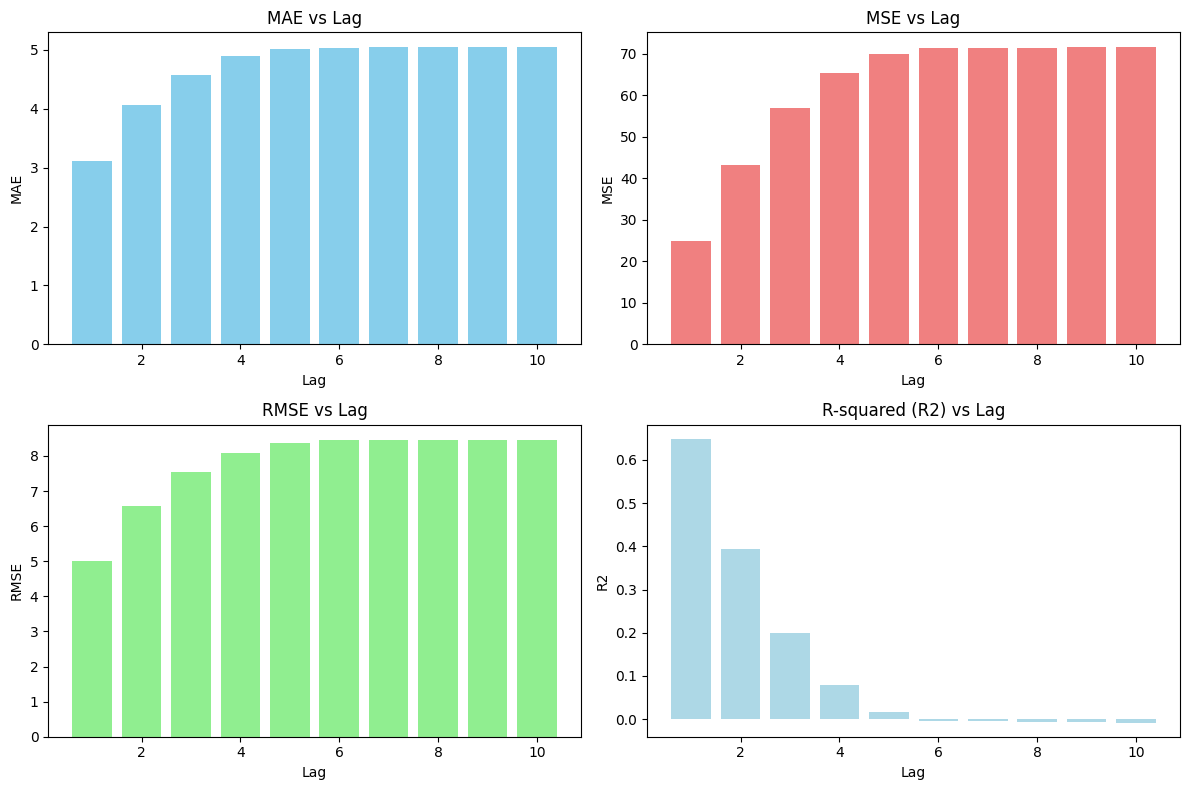

In [ ]:
import matplotlib.pyplot as plt

# Sample data from df_metric_lr
df_metric_lr = pd.DataFrame(results)

# Set the Lag column as the index
df_metric_lr.set_index('Lag', inplace=True)

# Create bar charts for each metric
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
plt.bar(df_metric_lr.index, df_metric_lr['MAE'], color='skyblue')
plt.xlabel('Lag')
plt.ylabel('MAE')
plt.title('MAE vs Lag')

# MSE
plt.subplot(2, 2, 2)
plt.bar(df_metric_lr.index, df_metric_lr['MSE'], color='lightcoral')
plt.xlabel('Lag')
plt.ylabel('MSE')
plt.title('MSE vs Lag')

# RMSE
plt.subplot(2, 2, 3)
plt.bar(df_metric_lr.index, df_metric_lr['RMSE'], color='lightgreen')
plt.xlabel('Lag')
plt.ylabel('RMSE')
plt.title('RMSE vs Lag')

# R2
plt.subplot(2, 2, 4)
plt.bar(df_metric_lr.index, df_metric_lr['R2'], color='lightblue')
plt.xlabel('Lag')
plt.ylabel('R2')
plt.title('R-squared (R2) vs Lag')

plt.tight_layout()
plt.show()


Lag 1 gives the best result for linear regression.

### Seasonal Time Decomposition

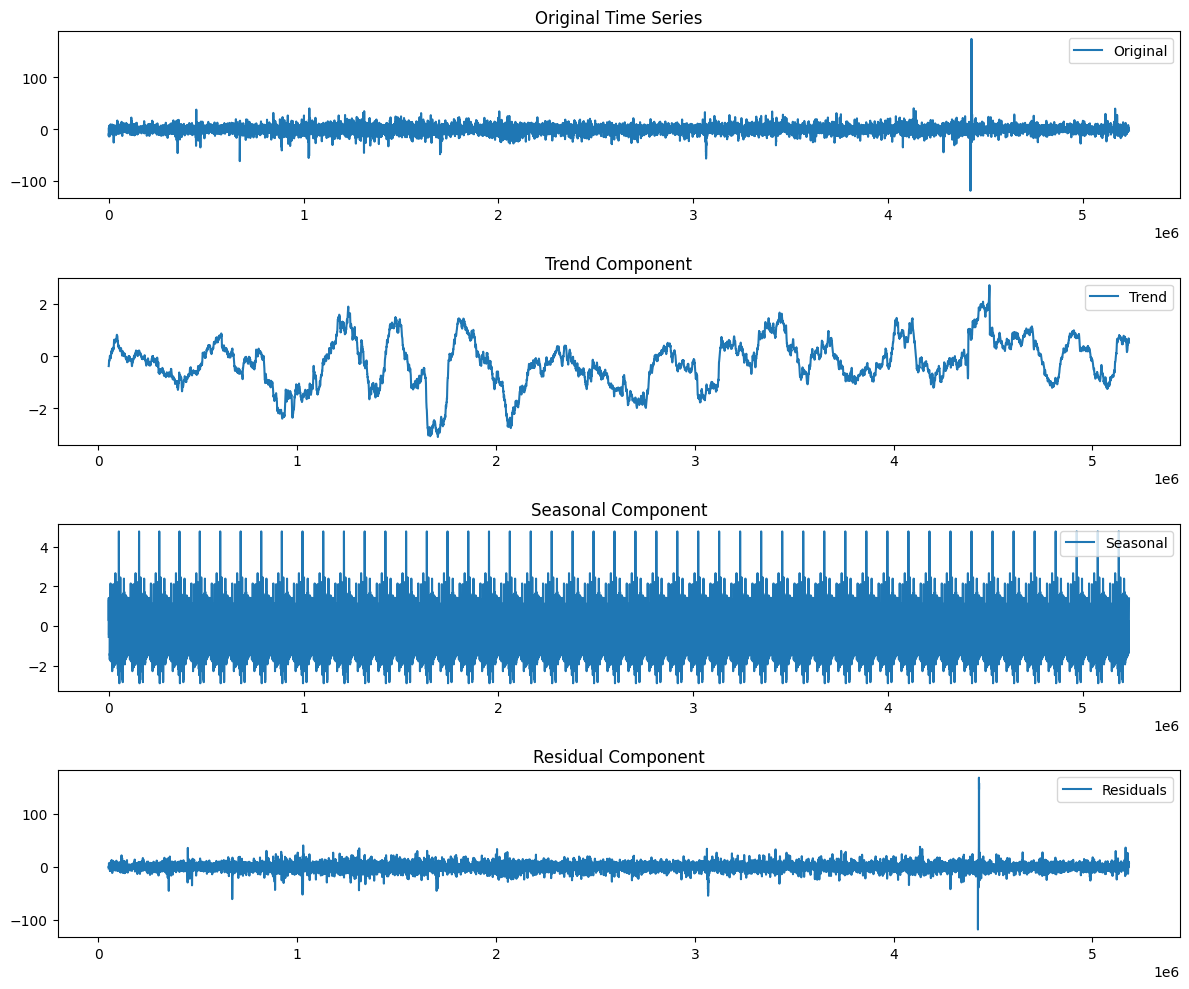

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame named stock_52 with 'date_id' and 'target' columns

# Create a new DataFrame for the decomposition results
decomposed_data = stock_52.copy()

# Perform seasonal decomposition with 'date_id' as the time variable
result = seasonal_decompose(decomposed_data['target'], model='additive', period=540)
# can't use multiplicative as target have negative and zeros

# Access the components (trend, seasonality, and residuals)
decomposed_data['trend'] = result.trend
decomposed_data['seasonal'] = result.seasonal
decomposed_data['residuals'] = result.resid

# Plot the components (optional)
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposed_data['target'], label='Original')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposed_data['trend'], label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposed_data['seasonal'], label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposed_data['residuals'], label='Residuals')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# The decomposed_data DataFrame now contains the original data and decomposition components


### Combining ARIMA with ML models

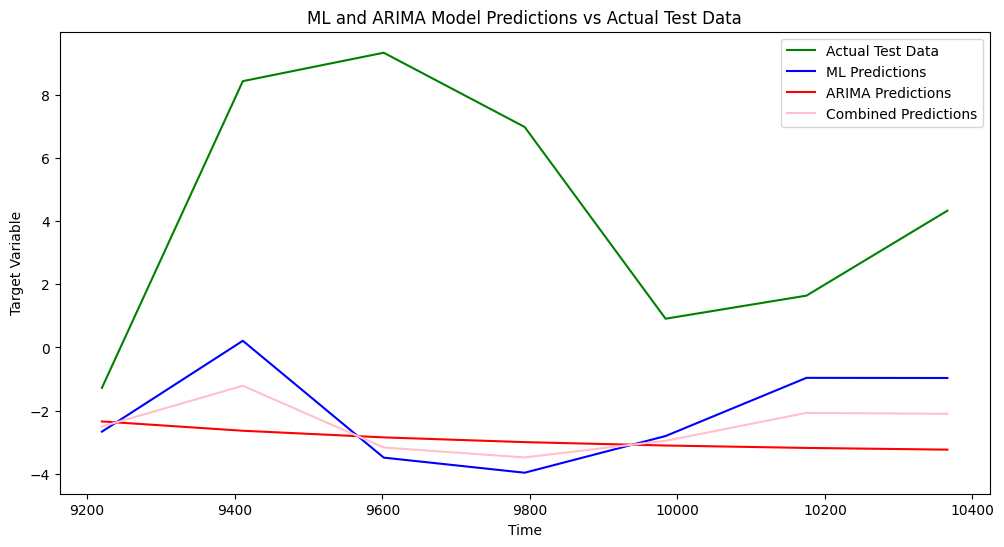

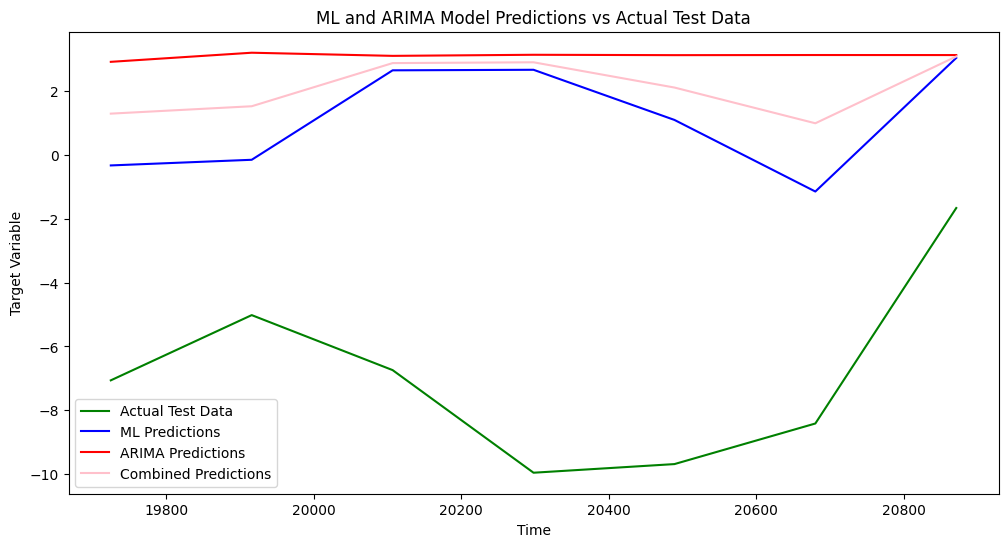

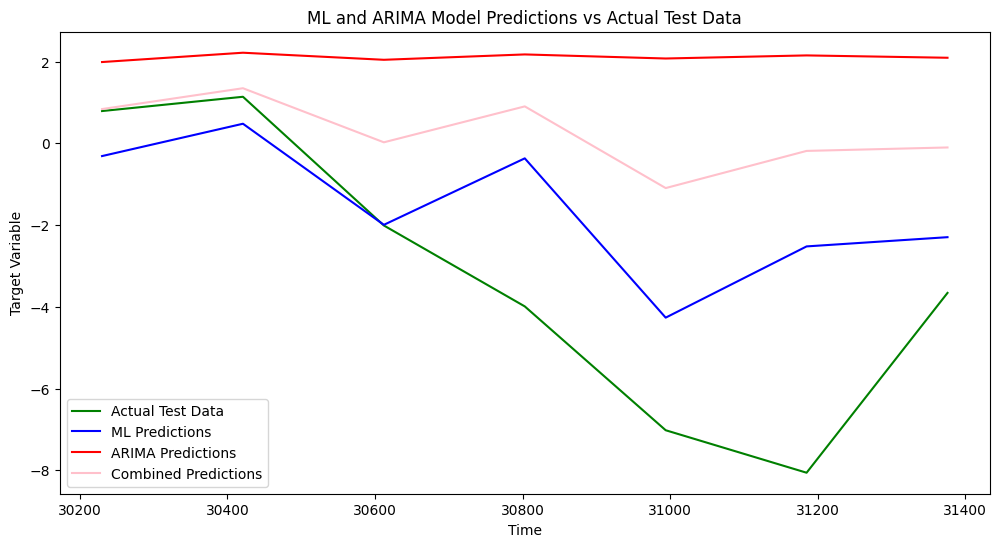

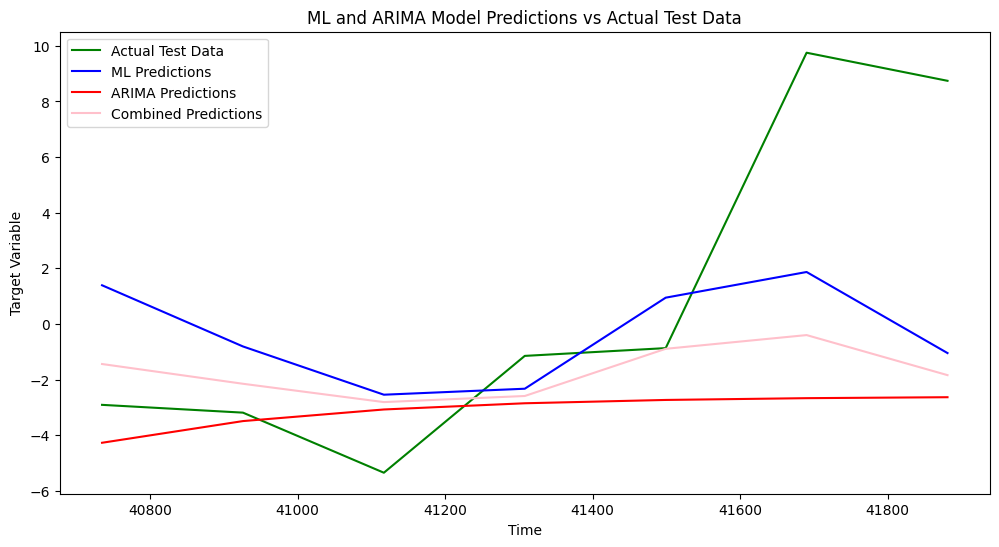

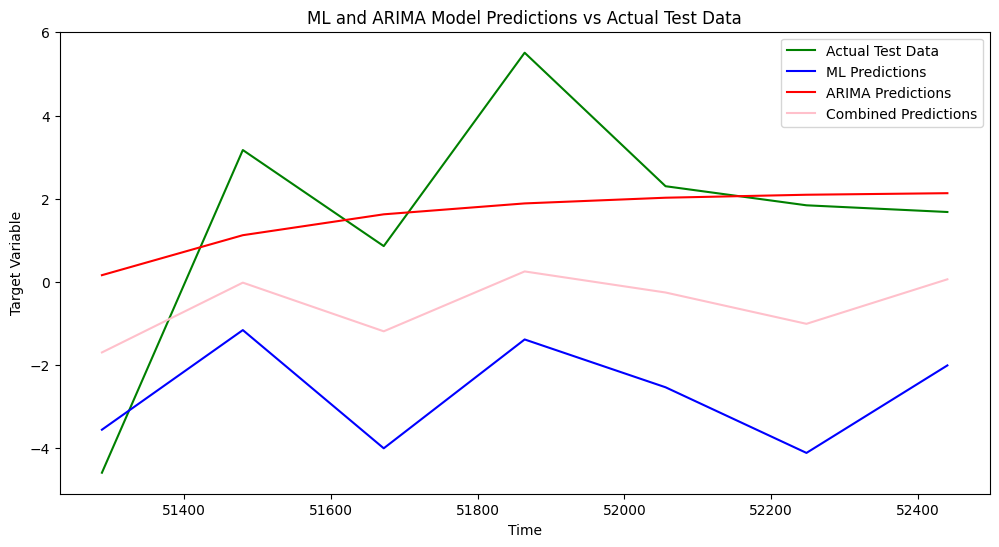

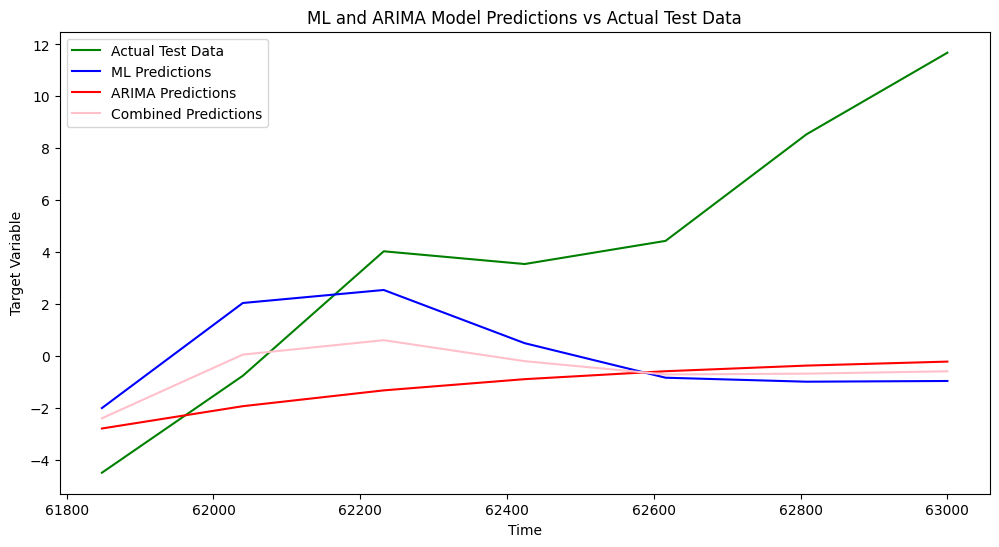

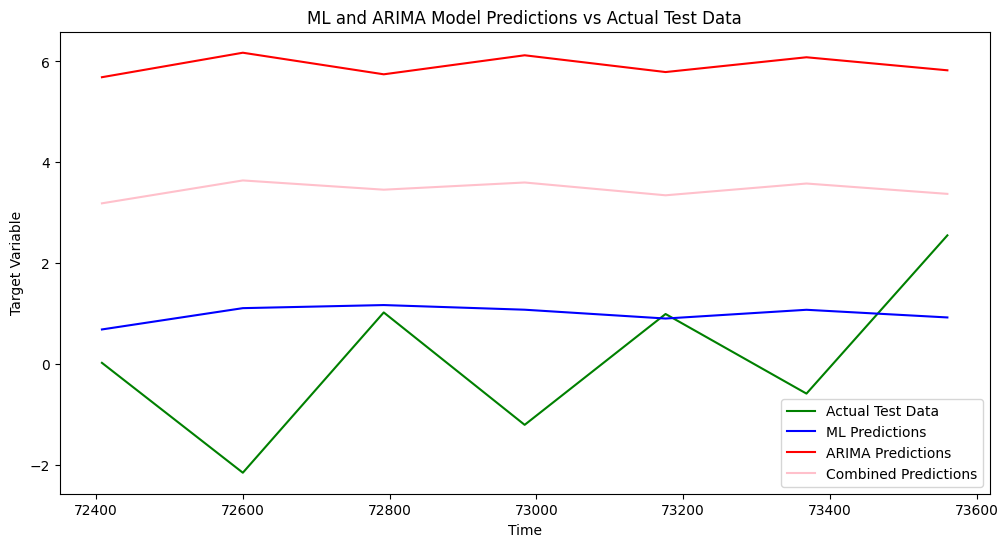

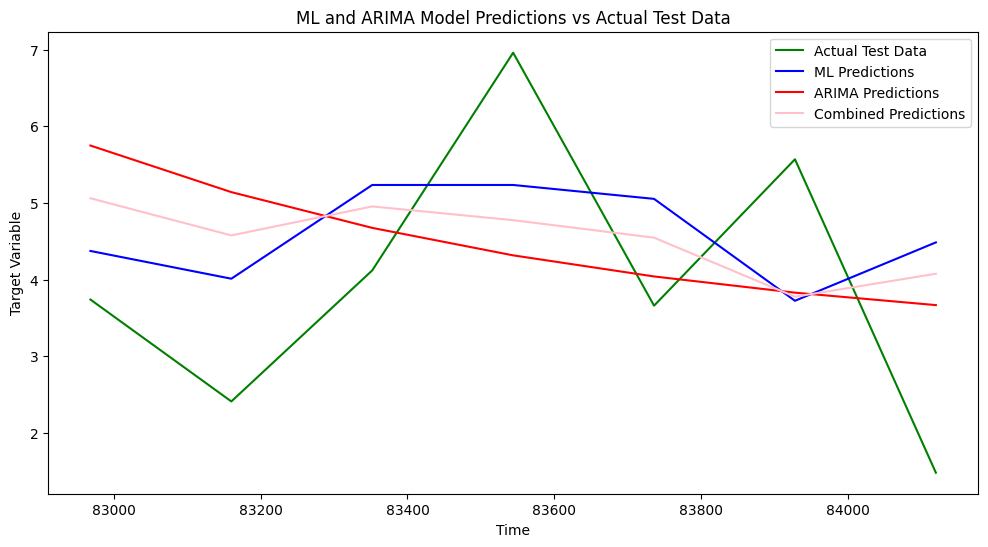

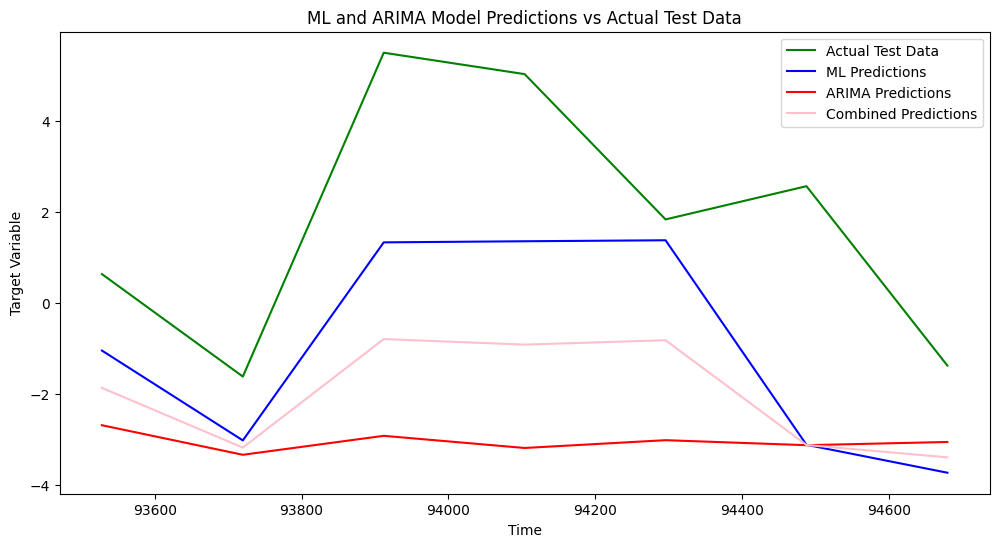

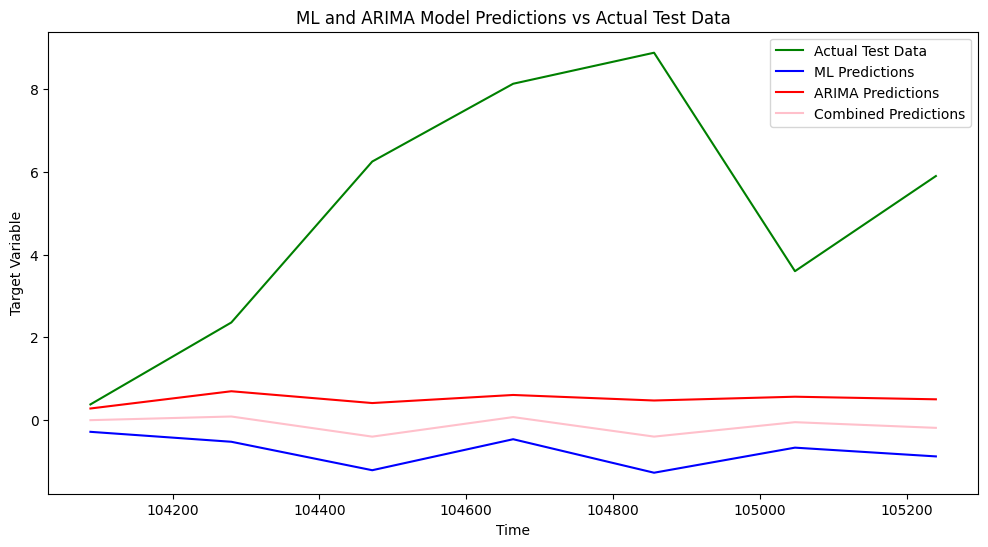

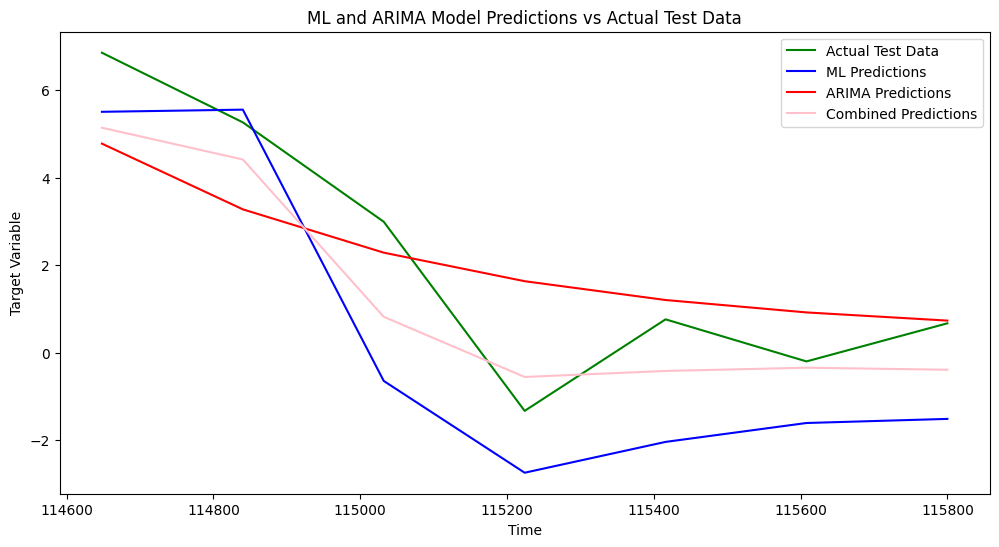

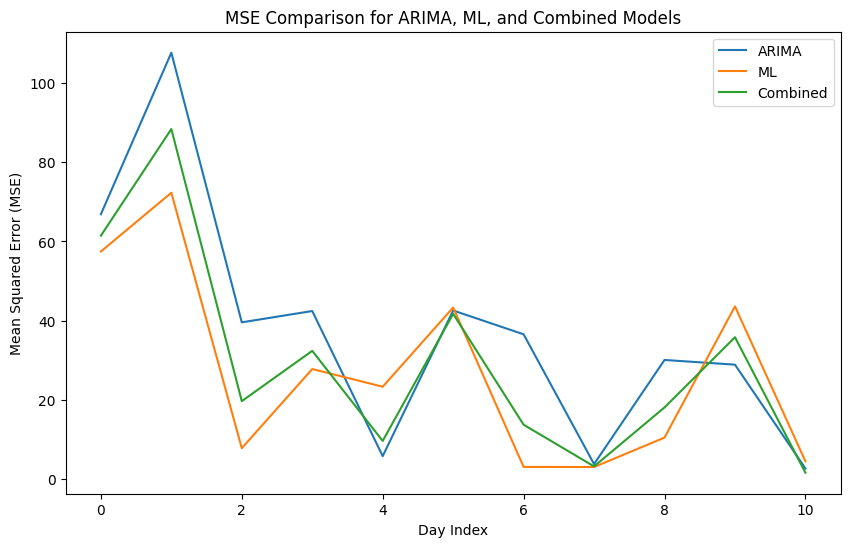

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


def train_and_predict_arima(train_data, test_data, order):
    # Train ARIMA model
    arima_model = ARIMA(train_data, order=order)
    arima_fit = arima_model.fit()

    # Make predictions
    arima_predictions = arima_fit.forecast(steps=len(test_data))


    return arima_predictions

def train_and_predict_ml(train_features, train_target, test_features):
    # Train machine learning model (Random Forest as an example)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_features, train_target)

    # Make predictions
    ml_predictions = rf_model.predict(test_features)

    return ml_predictions

data = stock_52

predictions_df = pd.DataFrame(columns=['date_id', 'combined_prediction'])
mse_arima_list, mse_ml_list, mse_combined_list = [], [], []

# Loop over each unique date_id
for date_id in data['date_id'].unique():

    if date_id >10:
      break

    # Subset data for the current date_id
    subset = data[data['date_id'] == date_id]

    # Split the data into training (0-480 seconds) and testing (480-540 seconds)
    train = subset[subset['seconds_in_bucket'] < 480]
    test = subset[(subset['seconds_in_bucket'] >= 480) & (subset['seconds_in_bucket'] <= 540)]

    # Train ARIMA model and get predictions
    arima_predictions = train_and_predict_arima(train['target'], test, order=(p, d, q))
    # print("ARIMA predications:", arima_predictions)


    # Train machine learning model and get predictions
    features = ['stock_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap']
    target = 'target'
    X_train, X_test = train[features], test[features]
    y_train, y_test = train[target], test[target]
    ml_predictions = train_and_predict_ml(X_train, y_train, X_test)
    # print("ML predications:", ml_predictions)

    # Combine predictions (you can adjust weights or use different combination methods)
    combined_predictions = (arima_predictions + ml_predictions) / 2
    # print("Combined predications:", combined_predictions)

    # Store the combined predictions in the DataFrame
    predictions_df = predictions_df.append(pd.DataFrame({'date_id': [date_id] * len(test), 'combined_prediction': combined_predictions}, index=test.index))

    # print( mean_squared_error(test['target'], arima_predictions),
    #       mean_squared_error(test['target'], ml_predictions),
    #        mean_squared_error(test['target'], combined_predictions))

     # Calculate MSE for each model
    mse_arima = mean_squared_error(test['target'], arima_predictions)
    mse_ml = mean_squared_error(test['target'], ml_predictions)
    mse_combined = mean_squared_error(test['target'], combined_predictions)

    plt.figure(figsize=(12, 6))
    plt.plot(test['target'], label='Actual Test Data', color='green')
    plt.plot(test.index, ml_predictions, label='ML Predictions', color='blue')
    plt.plot(test.index, arima_predictions, label='ARIMA Predictions', color='red')
    plt.plot(test.index, combined_predictions, label='Combined Predictions', color='pink')

    plt.title('ML and ARIMA Model Predictions vs Actual Test Data')
    plt.xlabel('Time')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

    mse_arima_list.append(mse_arima)
    mse_ml_list.append(mse_ml)
    mse_combined_list.append(mse_combined)



# Plot line graph for the three MSE scores
plt.figure(figsize=(10, 6))
plt.plot(mse_arima_list, label='ARIMA')
plt.plot(mse_ml_list, label='ML')
plt.plot(mse_combined_list, label='Combined')
plt.xlabel('Day Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for ARIMA, ML, and Combined Models')
plt.legend()
plt.show()

# Reset the warning filters
warnings.resetwarnings()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


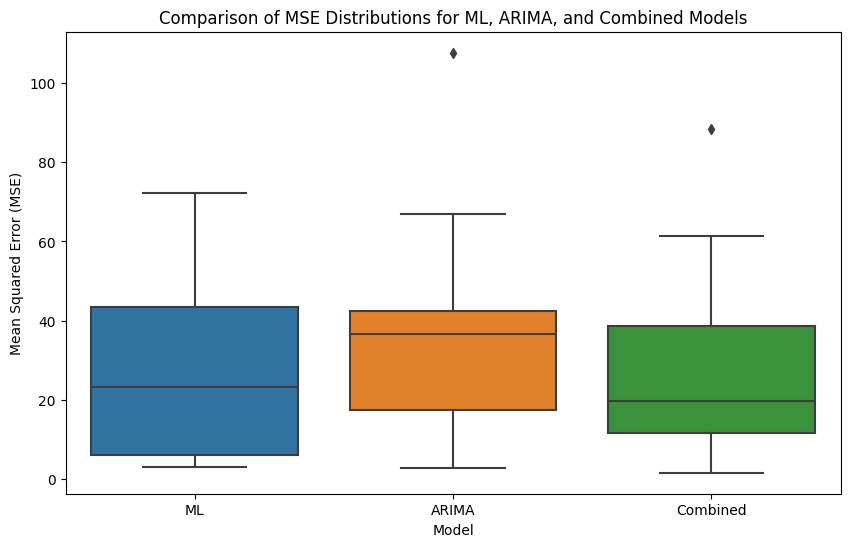

In [ ]:
import seaborn as sns


# Create a DataFrame with MSE values and corresponding model labels
mse_data = pd.DataFrame({'Model': ['ML'] * len(mse_ml_list) + ['ARIMA'] * len(mse_arima_list) + ['Combined'] * len(mse_combined_list),
                         'MSE': mse_ml_list + mse_arima_list + mse_combined_list})

# Plot a boxplot to compare MSE distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=mse_data)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Distributions for ML, ARIMA, and Combined Models')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Creating synthetic index and calculating target using wap

In [ ]:
stock_wap = df[df['stock_id'] == 52]
stock_wap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26455 entries, 52 to 5237832
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 26455 non-null  int64  
 1   date_id                  26455 non-null  int64  
 2   seconds_in_bucket        26455 non-null  int64  
 3   imbalance_size           26455 non-null  float64
 4   imbalance_buy_sell_flag  26455 non-null  int64  
 5   reference_price          26455 non-null  float64
 6   matched_size             26455 non-null  float64
 7   far_price                11862 non-null  float64
 8   near_price               12025 non-null  float64
 9   bid_price                26455 non-null  float64
 10  bid_size                 26455 non-null  float64
 11  ask_price                26455 non-null  float64
 12  ask_size                 26455 non-null  float64
 13  wap                      26455 non-null  float64
 14  target             

### Creating synthetic index

In [ ]:
# IndexWAP = (near_price * imbalance_buy_sell_flag) + (far_price * (1 - imbalance_buy_sell_flag))

stock_wap['WAP Index'] = stock_wap['near_price']*stock_wap['imbalance_buy_sell_flag'] + stock_wap['far_price']*( 1 - stock_wap['imbalance_buy_sell_flag'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-0d8170f12cee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_wap['WAP Index'] = stock_wap['near_price']*stock_wap['imbalance_buy_sell_flag'] + stock_wap['far_price']*( 1 - stock_wap['imbalance_buy_sell_flag'])


In [ ]:
stock_wap['WAP Index'].tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5237032    0.999224
5237232    0.999430
5237432    0.999327
5237632    0.999327
5237832    0.999327
Name: WAP Index, dtype: float64

In [ ]:
def calculate_approx_wap(df):
  df['WAP index approx'] = df['reference_price'] * (df['imbalance_size'] / (df['matched_size'] + df['imbalance_size']))
  return df



In [ ]:
stock_wap = calculate_approx_wap(stock_wap)

<ipython-input-49-c923d0ec93b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WAP index approx'] = df['reference_price'] * (df['imbalance_size'] / (df['matched_size'] + df['imbalance_size']))


In [ ]:
stock_wap['WAP index approx']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


52         0.183931
243        0.152988
434        0.152975
625        0.148832
816        0.150376
             ...   
5237032    0.011690
5237232    0.023455
5237432    0.023455
5237632    0.023455
5237832    0.008280
Name: WAP index approx, Length: 26455, dtype: float64

In [ ]:
(stock_wap.reference_price == np.NaN).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
stock_wap.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,WAP Index,WAP index approx
52,52,0,0,1589228.95,-1,1.000204,7052889.31,NaN,NaN,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52,NaN,0.183931
243,52,0,10,1321097.26,-1,1.000791,7321021.00,NaN,NaN,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52,NaN,0.152988
434,52,0,20,1321097.26,-1,1.000707,7321021.00,NaN,NaN,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52,NaN,0.152975
625,52,0,30,1285314.56,-1,1.000707,7356803.70,NaN,NaN,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52,NaN,0.148832
816,52,0,40,1302609.53,-1,1.000875,7367299.96,NaN,NaN,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52,NaN,0.150376


### Calculating Target values from wap

In [ ]:
# Assuming you have a DataFrame named 'stock_wap' containing the necessary columns
stock_wap['approx_target'] = ((stock_wap['wap'].shift(6) / stock_wap['wap']) - (stock_wap['WAP Index'].shift(6) / stock_wap['WAP Index'])) * 10000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-bd23fba7ff3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_wap['approx_target'] = ((stock_wap['wap'].shift(6) / stock_wap['wap']) - (stock_wap['WAP Index'].shift(6) / stock_wap['WAP Index'])) * 10000


In [ ]:
stock_wap[['target', 'approx_target']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,approx_target
52,1.000166,NaN
243,-7.659793,NaN
434,-5.499721,NaN
625,-12.689829,NaN
816,-8.109808,NaN
...,...,...
5237032,0.239611,30.632631
5237232,1.209974,29.476896
5237432,-0.470281,7.445320
5237632,0.159740,-0.610514


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='time_id'>

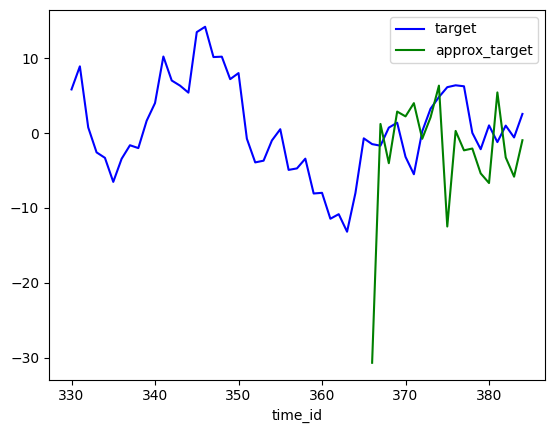

In [ ]:
stock_wap[stock_wap['date_id'] == 6].plot(x='time_id', y=['target', 'approx_target'], style=['b-', 'g-'])

Failed to find correlation between wap and target.
So cannot use wap to find target.

## Support Vector Machine

- Applying log to check if the graph smoothens for better identification of trends and patterns.

- Trying SVM to predict time series data.

In [ ]:
stock_52.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,minute_of_day,day_of_week
52,52,0,0,1589228.95,-1,1.000204,7052889.31,0.0,0.0,0.999701,12162.48,1.000120,4890.89,1.000000,1.000166,0,0_0_52,0,0
243,52,0,10,1321097.26,-1,1.000791,7321021.00,0.0,0.0,1.000707,238.72,1.001042,35939.40,1.000709,-7.659793,1,0_10_52,0,0
434,52,0,20,1321097.26,-1,1.000707,7321021.00,0.0,0.0,1.000623,26376.35,1.000959,43219.18,1.000750,-5.499721,2,0_20_52,0,0
625,52,0,30,1285314.56,-1,1.000707,7356803.70,0.0,0.0,1.000623,26495.70,1.001042,10507.20,1.000923,-12.689829,3,0_30_52,0,0
816,52,0,40,1302609.53,-1,1.000875,7367299.96,0.0,0.0,1.000791,596.85,1.001042,10746.00,1.000804,-8.109808,4,0_40_52,0,0


In [ ]:
# Remove all unrelated columns
stock_52_time = stock_52[['stock_id', 'date_id', 'seconds_in_bucket', 'time_id', 'target']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stock_52_time = stock_52_time[stock_52_time['date_id'] == 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_data = stock_52_time[stock_52_time['seconds_in_bucket'] <= 480].copy()

In [ ]:
test_data = stock_52_time[stock_52_time['seconds_in_bucket'] > 480].copy()

In [ ]:
train_data

,stock_id,date_id,seconds_in_bucket,time_id,target
52,52,0,0,0,1.000166
243,52,0,10,1,-7.659793
434,52,0,20,2,-5.499721
625,52,0,30,3,-12.689829
816,52,0,40,4,-8.109808
1007,52,0,50,5,-14.029741
1198,52,0,60,6,-9.800196
1389,52,0,70,7,-8.919835
1580,52,0,80,8,-6.759763
1771,52,0,90,9,-1.779795


In [ ]:
features = ['stock_id', 'date_id', 'seconds_in_bucket', 'time_id']
target = [ 'target']
X_train, X_test, y_train, y_test = train_data[features], test_data[features], train_data[target], test_data[target]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def train_and_evaluate_svr(X_train, y_train, X_test, y_test, kernel='linear'):
    """
    Train and evaluate an SVR model.

    Parameters:
    - X_train: Features of the training set
    - y_train: Target variable of the training set
    - X_test: Features of the testing set
    - y_test: Target variable of the testing set
    - kernel: Kernel function for the SVR model (default is 'linear')

    Returns:
    - Mean Squared Error on the test set
    - SVR model
    - predictions
    """

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVR model
    svr_model = SVR(kernel=kernel)

    # Fit the SVR model to the training data
    svr_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svr_model.predict(X_test_scaled)


    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}');

    return mse, svr_model, y_pred

# linear model
mse, svr_model, y_pred = train_and_evaluate_svr(X_train,  y_train, X_test, y_test,  kernel = 'linear');


Mean Squared Error: 57.83108374094439
Mean Absolute Error: 6.86070460448941


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-1.69484453, -1.65317096, -1.61149738, -1.5698238 , -1.52815022,
       -1.48647664])

In [ ]:
stock_52_time['y_pred'] = np.NaN

In [ ]:
stock_52_time[stock_52_time['seconds_in_bucket'] > 480].loc['y_pred']  = y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-e96e9aea9a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_52_time[stock_52_time['seconds_in_bucket'] > 480].loc['y_pred']  = y_pred


In [ ]:
filtered_rows = stock_52_time['seconds_in_bucket'] > 480

# Assign the predictions to the 'y_pred' column for the filtered rows
stock_52_time.loc[filtered_rows, 'y_pred'] = y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='time_id'>

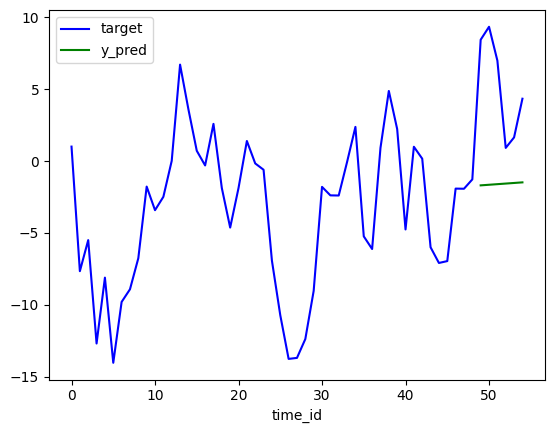

In [ ]:
stock_52_time.plot(x='time_id', y=['target', 'y_pred'], style=['b-', 'g-'])

In [ ]:
def create_graph(df, y_pred):

  df['y_pred'] = np.NaN
  df[df['seconds_in_bucket'] > 480].loc['y_pred']  = y_pred
  filtered_rows = df['seconds_in_bucket'] > 480

  # Assign the predictions to the 'y_pred' column for the filtered rows
  df.loc[filtered_rows, 'y_pred'] = y_pred

  df.plot(x='time_id', y=['target', 'y_pred'], style=['b-', 'g-'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-70-7d86ac9b078a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['seconds_in_bucket'] > 480].loc['y_pred']  = y_pred


Mean Squared Error: 43.489632210653696
Mean Absolute Error: 5.517849210222443


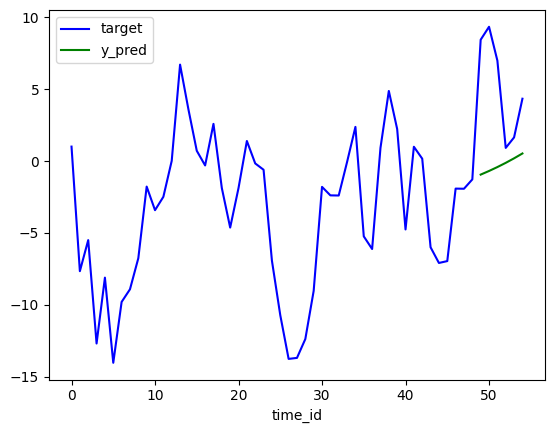

In [ ]:
# polynomial SVR

mse, svr_model, y_pred = train_and_evaluate_svr(X_train,  y_train, X_test, y_test,  kernel = 'poly');

create_graph(stock_52_time, y_pred)

In [ ]:
import pickle

# pickle file
def create_pickle_file(model, name):

  # Assuming svr_model is your trained SVR model
  with open(name, 'wb') as model_file:
      pickle.dump(model, model_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
create_pickle_file(svr_model, 'svr_poly.pkl');